In [1]:
import os
import json
import numpy as np
import pandas as pd

In [9]:
topic, edit_method, model = "tmp_places_country_ROME_meta_llama_3.1_8b_instruct_results.json".split('_')[2:5]
topic, edit_method, model 

('country', 'ROME', 'meta')

In [12]:
with open('../tmp/tmp2_places_country_ROME_meta_llama_3.1_8b_instruct_results.json', 'r') as file:
    metrics = json.load(file)
metrics[0]

{'pre': {'edit_acc': 0,
  'edit_output': 'Bechuanaland',
  'edit_acc_multi_turn': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'edit_output_multi_turn': ['Bechuanaland',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes'],
  'locality': {'locality_output': ['Gaborone']},
  'portability': {},
  'yes_questions': {'yes_acc': [1], 'yes_output': ['Yes']},
  'no_questions': {'no_acc': [0], 'no_output': ['Yes']},
  'multiple_choice_questions': {'multiple_choice_acc': [0],
   'multiple_choice_output': ['Bechuanaland']},
  'reversed_relation_questions': {'reversed_relation_acc': [0],
   'reversed_relation_output': ['Ireland']},
  'questions_2hop': {'2hop_acc': [1], '2hop_output': ['South Africa']},
  'questions_3hop': {'3hop_acc': [0], '3hop_output': ['South Africa']},
  'questions_4hop': {'4hop_acc': [0], '4hop_output': ['English']},
  'questions_5hop': {'5hop_acc': [0], '5hop_output': ['South Africa']},
  'questions_6hop': {'6hop_acc': [1], '6hop_output

In [19]:
import matplotlib.pyplot as plt

def plot_multi_turn(metrics):
    multi_turn_ls_pre, multi_turn_ls_post = [], []
    for e in metrics:
        multi_turn_ls_pre.append(e['pre']['edit_acc_multi_turn'])
        multi_turn_ls_post.append(e['post']['edit_acc_multi_turn'])
    multi_turn_ls_avg_pre = np.mean(multi_turn_ls_pre, axis=0)[1:]
    multi_turn_ls_avg_post = np.mean(multi_turn_ls_post, axis=0)[1:]

    # plt.figure(figsize=(10, 6))
    plt.plot(multi_turn_ls_avg_pre, label='Pre-edit')
    plt.plot(multi_turn_ls_avg_post, label='Post-edit')
    plt.xlabel('Turn')
    plt.ylabel('Edit Accuracy')
    plt.legend()
    plt.show()

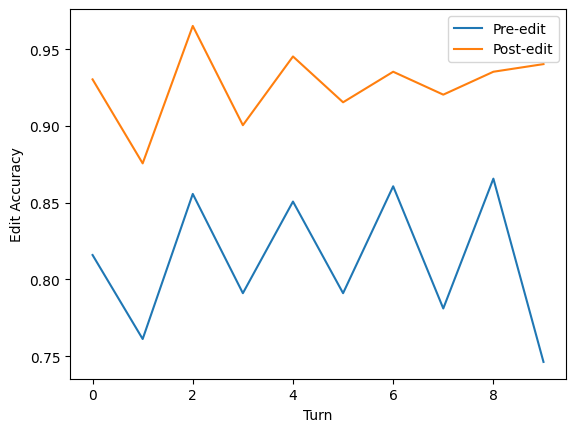

In [20]:
with open('../tmp/multi_turn_1_places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

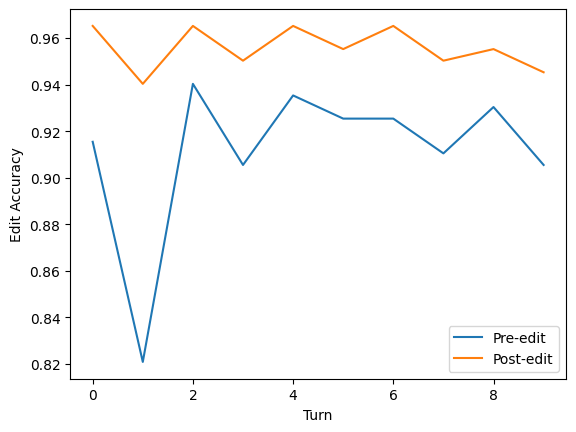

In [21]:
with open('../tmp/multi_turn_2_places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

In [28]:
def get_avg_std(metric_list, percent=100, std_flag=False):
    mean_val = np.mean(metric_list)
    std_val = np.std(metric_list)
    if std_flag:
        return f"{mean_val*percent:.2f}±{std_val:.2f}"
    else:
        return np.round(mean_val*percent, 2)


def summarize_json_to_df(json_folder, std_flag=False):
    metrics_list = []

    for filename in os.listdir(json_folder):
        if filename.endswith('.json'):
            filepath = os.path.join(json_folder, filename)
            with open(filepath, 'r') as file:
                metrics = json.load(file)
                base_filename = filename.replace('_results.json', '')
                topic, edit_method, model = base_filename.split('_')[2:5]

                results = {
                    "topic": topic,
                    "edit_method": edit_method,
                    "model": model,
                    "efficacy_pre": get_avg_std([e['pre']['edit_acc'][0] for e in metrics]),
                    "efficacy_post": get_avg_std([e['post']['edit_acc'][0] for e in metrics]),
                    "generalization_pre": get_avg_std([e['pre']['rephrase_acc'][0] for e in metrics]),
                    "generalization_post": get_avg_std([e['post']['rephrase_acc'][0] for e in metrics]),
                    "yes_pre": get_avg_std([e['pre']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "yes_post": get_avg_std([e['post']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "no_pre": get_avg_std([e['pre']['no_questions']['no_acc'][0] for e in metrics]),
                    "no_post": get_avg_std([e['post']['no_questions']['no_acc'][0] for e in metrics]),
                    "multiple_choice_pre": get_avg_std([e['pre']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "multiple_choice_post": get_avg_std([e['post']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "reversed_relation_pre": get_avg_std([e['pre']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "reversed_relation_post": get_avg_std([e['post']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "locality_post": get_avg_std([e['post']['locality'][f'locality_acc'][0] for e in metrics]),
                }
                metrics_list.append(results)
    df = pd.DataFrame(metrics_list)
    # df['edit_method'] = pd.Categorical(df['edit_method'], ["ROME", "FT-M", "ICL"])
    # df['Gene_increase'] = df.apply(lambda x: x['Generalization_post'] - x['Generalization_pre'], axis=1)
    # df['Port_increase'] = df.apply(lambda x: x['Portability_post'] - x['Portability_pre'], axis=1)
    # return df[['edit_method', 'model', 'Reliability_pre', 'Reliability_post', 'Reli_increase', 'Generalization_pre', 
    #            'Generalization_post', 'Gene_increase', 'Portability_pre', 'Portability_post', 'Port_increase']]
    return df


summarize_json_to_df("../tmp/")#.sort_values(by=['edit_method', 'model'])

,topic,edit_method,model,efficacy_pre,efficacy_post,Generalization_pre,Generalization_post,yes_pre,yes_post,no_pre,no_post,multiple_choice_pre,multiple_choice_post,reversed_relation_pre,reversed_relation_post,locality_post
0,country,ROME,meta,0.0,85.07,21.89,83.08,78.11,86.07,47.76,29.85,53.73,63.18,21.89,50.25,73.63
1,city,ROME,meta,0.0,88.16,5.61,81.00,61.37,89.10,38.01,18.38,45.48,61.68,11.84,12.15,30.84


In [26]:
def summarize_json_to_df(json_folder, std_flag=False):
    metrics_list = []

    for filename in os.listdir(json_folder):
        if filename.endswith('.json'):
            filepath = os.path.join(json_folder, filename)
            with open(filepath, 'r') as file:
                metrics = json.load(file)
                base_filename = filename.replace('_results.json', '')
                topic, edit_method, model = base_filename.split('_')[2:5]

                results = {
                    "topic": topic,
                    "edit_method": edit_method,
                    "model": model,
                    "questions_2hop_pre": get_avg_std([e['pre']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_2hop_post": get_avg_std([e['post']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_3hop_pre": get_avg_std([e['pre']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_3hop_post": get_avg_std([e['post']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_4hop_pre": get_avg_std([e['pre']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_4hop_post": get_avg_std([e['post']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_5hop_pre": get_avg_std([e['pre']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_5hop_post": get_avg_std([e['post']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_6hop_pre": get_avg_std([e['pre']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                    "questions_6hop_post": get_avg_std([e['post']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                }
                metrics_list.append(results)
    df = pd.DataFrame(metrics_list)
    # df['edit_method'] = pd.Categorical(df['edit_method'], ["ROME", "FT-M", "ICL"])
    # df['Reli_increase'] = df.apply(lambda x: x['Reliability_post'] - x['Reliability_pre'], axis=1)
    # df['Gene_increase'] = df.apply(lambda x: x['Generalization_post'] - x['Generalization_pre'], axis=1)
    # df['Port_increase'] = df.apply(lambda x: x['Portability_post'] - x['Portability_pre'], axis=1)
    # return df[['edit_method', 'model', 'Reliability_pre', 'Reliability_post', 'Reli_increase', 'Generalization_pre', 
    #            'Generalization_post', 'Gene_increase', 'Portability_pre', 'Portability_post', 'Port_increase']]
    return df


summarize_json_to_df("../tmp/")#.sort_values(by=['edit_method', 'model'])

,topic,edit_method,model,questions_2hop_pre,questions_2hop_post,questions_3hop_pre,questions_3hop_post,questions_4hop_pre,questions_4hop_post,questions_5hop_pre,questions_5hop_post,questions_6hop_pre,questions_6hop_post,locality_post
0,country,ROME,meta,71.64,50.75,41.79,31.34,47.76,38.31,41.29,34.33,36.32,35.82,73.63
1,city,ROME,meta,19.00,13.08,24.92,21.18,23.99,19.63,21.81,20.25,26.79,22.12,30.84
